In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
#Library to perform operations
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Library for Logistic Regression
from sklearn.linear_model import LogisticRegression
#Library to save the models using Joblib
from sklearn.externals import joblib 
#Library to measure the squared error
from sklearn.metrics import mean_squared_error
#Library to load the dataset
from scipy.io import loadmat
#Library to call One vs One
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
#Library to call One vs Rest
from sklearn.multiclass import OneVsRestClassifier

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [3]:
#Loading the Dataset3
data_3 = loadmat('/content/dataset_2.mat')
print(data_3)

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sat Sep 26 16:40:55 2020', '__version__': '1.0', '__globals__': [], 'samples': array([[-1.43675238, -3.9265797 ],
       [-2.00349195, -3.54813747],
       [-0.73024538, -4.45436567],
       ...,
       [-3.0936506 ,  3.44629184],
       [ 6.43886415,  3.20051189],
       [ 5.34614831,  3.80708106]]), 'labels': array([[0, 0, 0, ..., 1, 3, 3]])}


In [4]:
#Printing the keys of Data
print(data_3.keys()) 
#Printing the samples    
print(data_3['samples'])
#Printing the length of the Data
print(len(data_3))

dict_keys(['__header__', '__version__', '__globals__', 'samples', 'labels'])
[[-1.43675238 -3.9265797 ]
 [-2.00349195 -3.54813747]
 [-0.73024538 -4.45436567]
 ...
 [-3.0936506   3.44629184]
 [ 6.43886415  3.20051189]
 [ 5.34614831  3.80708106]]
5


In [5]:
#Printing the information related to the data
x_1 = data_3['samples']
y_1 = data_3['labels']
print("Samples Data Type",x_1.dtype)
print("Label Data Type",y_1.dtype)
print("Shape of Samples", x_1.shape)
print("Shape of Label", y_1.shape)

Samples Data Type float64
Label Data Type int64
Shape of Samples (10000, 2)
Shape of Label (1, 10000)


In [6]:
#Convert to DataFrame
sample_x = x_1[:,0]
sample_y = x_1[:,1]
label = y_1[0]
data_frame = pd.DataFrame(list(zip(sample_x,sample_y,label)), columns=["Sample_X","Sample_Y","Label"])
#Shuffle the Dataset
data_frame = data_frame.sample(frac = 1).reset_index(drop=True)
data_frame.insert(0,'Sample_0',1.0)
print(data_frame)
print(data_frame.shape)

      Sample_0  Sample_X  Sample_Y  Label
0          1.0 -1.436752 -3.926580      0
1          1.0 -2.003492 -3.548137      0
2          1.0 -0.730245 -4.454366      0
3          1.0 -2.997647 -4.502650      0
4          1.0 -3.353432 -4.616474      0
...        ...       ...       ...    ...
9995       1.0  4.702887  2.357193      2
9996       1.0  4.772458  1.608002      2
9997       1.0 -3.093651  3.446292      1
9998       1.0  6.438864  3.200512      3
9999       1.0  5.346148  3.807081      3

[10000 rows x 4 columns]
(10000, 4)


In [7]:
#Dividing the Dataset into Samples and Labels separately after shuffling
data_y = data_frame['Label']
print(data_y)
data_x = data_frame.drop(["Label"],axis=1)
print(data_x)

0       0
1       0
2       0
3       0
4       0
       ..
9995    2
9996    2
9997    1
9998    3
9999    3
Name: Label, Length: 10000, dtype: int64
      Sample_0  Sample_X  Sample_Y
0          1.0 -1.436752 -3.926580
1          1.0 -2.003492 -3.548137
2          1.0 -0.730245 -4.454366
3          1.0 -2.997647 -4.502650
4          1.0 -3.353432 -4.616474
...        ...       ...       ...
9995       1.0  4.702887  2.357193
9996       1.0  4.772458  1.608002
9997       1.0 -3.093651  3.446292
9998       1.0  6.438864  3.200512
9999       1.0  5.346148  3.807081

[10000 rows x 3 columns]


In [8]:
# joblib.dump(data_frame, 'data_3.pkl')
# joblib.dump(data_x, 'data_x.pkl') 

In [9]:
#Printing the unique values of the Label
print(data_frame["Label"].unique())

[0 2 1 3]


### **Question 3a**

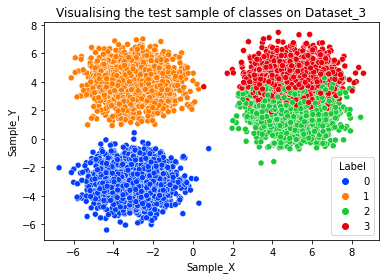

In [10]:
def Question3a(data_frame):
  palette = sns.color_palette("bright", 4)
  #Plotting the scatterplot for each class using seaborn
  sns.scatterplot(data=data_frame, x="Sample_X",y="Sample_Y",hue = "Label",legend='full',palette=palette)
  plt.title("Visualising the test sample of classes on Dataset_3")

data_frame = joblib.load('/content/data_3.pkl')
Question3a(data_frame)

### **Question 3b and 3c**

In [11]:
#Function to split the Dataset into K-Folds 
def k_folds(k):
  #List to store the divided index of the training and testing data for K-Folds
  train_index = []
  test_index = []
  total_index=[]
  folds = [0]
  #Finding the point of Division
  div = int(data_x.shape[0]/k)
  total_index.extend(range(data_x.shape[0]))
  #Storing the points of division of the index
  for i in range(1,k):
    folds.append(div*i)
  folds.append(data_x.shape[0])
  #Keeping one fold of index for test and rest of the index for Train
  for i in range(len(folds)-1):
    test_list = []
    train_list = []
    test_list.extend(range(folds[i], folds[i+1]))
    train_list = list(set(total_index) - set(test_list))
    train_index.append(train_list)
    test_index.append(test_list)
  return train_index,test_index,k

In [12]:
class LogRegression(object):
    def __init__(self,type_o):
      super(LogRegression, self).__init__()
      #Type to store whether it is ovo or ovr
      self.type_o = type_o

    #Sigmoid Function
    def sigmoid(self,z):
      ans = 1/(1 + np.exp(-z))
      return ans

    #Calling the Hypothesis Function
    def hypothesis(self,X,theta):
      z =  X.dot(theta)
      h_theta = self.sigmoid(z)
      return h_theta

    #Finding the Coefficients/theta
    def find_coefficients(self,X_train,Y_train,learning_rate,iterations,lamb):
      theta_coef = np.zeros((X_train.shape[1]), dtype=float)
      theta_coef = theta_coef.reshape(X_train.shape[1],1)
      for i in range(iterations):
        x = np.array(X_train)
        #Predicting the Y value
        y_pred = self.hypothesis(x,theta_coef)
        #Actual Y value
        y_actual = np.array(Y_train).reshape(Y_train.shape[0],1)
        #Getting error 
        error = y_pred-y_actual
        #Finding the Gradient
        gradient = np.transpose(error).dot(x)
        for j in range(gradient.shape[1]):
          theta_coef[j] = theta_coef[j] - learning_rate * (lamb * theta_coef[j] + gradient[0][j])
      return theta_coef

    #One vs One
    def ovo(self,X_train,Y_train,alpha,iteration,lamb):
      #Storing the Values of the Theta
      self.theta_o = []
      #Since there are 4 labels
      models = [0,1,2]
      reference = [1,2,3]
      #Iterating over the nc2 models created 01,02,03,12,13,23
      for model in models:
        for ref in reference:
          if ref > model:
            #Storing the X_train
            data_f = X_train
            #Storing the instances where the label is whether model or ref
            data = data_f.loc[data_f['Label'].isin([model,ref])]
            data = data.reset_index(drop=True)
            #Making the instance 0 whose class label is model
            data.loc[data['Label'] == model, 'Label'] = 0
            #Making the instance 1 whose class label is reference
            data.loc[data['Label'] == ref, 'Label'] = 1
            X_train_fit = data.drop(["Label"],axis=1)
            Y_train_fit = data['Label']  
            #Finding the theta
            theta = self.find_coefficients(X_train_fit,Y_train_fit,alpha,iteration,lamb)
            self.theta_o.append(theta)

    #One vs Rest
    def ovr(self,X_train,Y_train,alpha,iteration,lamb):
      #Storing the values of thetas
      self.thetas = []
      #Since there are 4 class labels
      models = [0,1,2,3]
      #Iterating over n models
      for model in models:
        models_t = [0,1,2,3]
        models_t.remove(model)
        #Storing the X_train
        data_f = X_train
        #Making the instance 0 whose class label is model
        data_f.loc[data_f['Label'] == model, 'Label1'] = 1
        #Making the instance 0 whose class label is not model
        data_f.loc[data_f['Label'] != model, 'Label1'] = 0
        X_train_fit = data_f.drop(["Label","Label1"],axis = 1)
        Y_train_fit = data_f['Label1']  
        #Finding the theta
        theta = self.find_coefficients(X_train_fit,Y_train_fit,alpha,iteration,lamb)
        self.thetas.append(theta)


    #fit function
    def fit(self,X_train,Y_train,alpha,iteration,lamb):
      if self.type_o == 'ovr':
        #If type is ovr call ovr function
        return self.ovr(X_train,Y_train,alpha,iteration,lamb)
      
      else:
        #If type is ovo call ovo function
        return self.ovo(X_train,Y_train,alpha,iteration,lamb)

    #predict function
    def predict(self,X_test):
      #If type is ovr
      if(self.type_o == 'ovr'):
        data_test = pd.DataFrame()
        num = 0
        #Predicting the values of the classes using the thetas passing in hypothesis function
        for i in range(len(self.thetas)):
          predict_y = self.hypothesis(X_test,self.thetas[i])
          predict_y = predict_y.loc[:,0]
          data_test[num] = predict_y
          num += 1
        #Getting the ID of the max probability class
        data_test = data_test.idxmax(axis = 1)
        return data_test
      #If type is ovo
      else:
        data_test = pd.DataFrame()
        num = 1
        for i in range(len(self.theta_o)):
          model = [0,0,0,1,1,2]
          ref = [1,2,3,2,3,3]
          #Predicting the values of the classes using the thetas passing in hypothesis function
          predict_y = self.hypothesis(X_test,self.theta_o[i])
          predict_y = predict_y.loc[:,0]
          #Assigning the class after getting the probabilities
          for k in predict_y.index:
            if predict_y[k] <= 0.5:
              predict_y[k] = model[i]
            else:
              predict_y[k] = ref[i]
          data_test['Model '+ str(num)] = predict_y
          num += 1
        #Getting the mode of the class labels coming from the probabilities
        data_test = data_test.mode(axis = 1).loc[:,0]
        return data_test

In [13]:
#accuracy method to find accuracy
def accuracy(pred,actual):
  pred = np.array(pred).reshape(pred.shape[0],1)
  actual = np.array(actual).reshape(actual.shape[0],1)
  error = pred-actual
  val = (error == 0).sum()

  #Calculate the accuracy
  accuracy = val/actual.shape[0]
  return accuracy*100

### **Question 3b without save models**

In [14]:
# def Question3b(data_x,data_frame):
#   columns_names = ["Folds","Training Accuracy","Validation Accuracy"]
#   Q3_b = pd.DataFrame(columns = columns_names)
#   columns_names_1 = ["Folds","Class","Classwise Accuracy"]
#   Q3_b1 = pd.DataFrame(columns = columns_names_1)
#   #Splitting the data into 5-Folds
#   train_index,test_index,fold = k_folds(5)
#   #Storing the models
#   Question3b = []
#   for i in range(fold):
#     #Getting the test data
#     data_p = data_frame.loc[test_index[i],:]
#     X_train_fit = data_frame.loc[train_index[i],:]
#     X_train = data_x.loc[train_index[i],:]
#     X_test = data_x.loc[test_index[i],:]
#     Y_train = data_frame.iloc[train_index[i],-1]    
#     Y_test = data_frame.iloc[test_index[i],-1]
#     #Calling the model with OVO
#     model = LogRegression('ovo')
#     thetas = model.fit(X_train_fit,Y_train,0.0001,1000,0.64)
#     Question3b.append(model)
#     #Predicting the values over test and train data
#     pred_train = model.predict(X_train)
#     pred_test = model.predict(X_test)
#     classes = [0,1,2,3]
#     #Printing the Classwise Accuracy
#     for class_m in classes:
#       pred = pred_test.loc[data_p['Label'].isin([class_m])]
#       actual = Y_test.loc[data_p['Label'].isin([class_m])]
#       acc = accuracy(pred,actual)
#       Q3_b1 = Q3_b1.append({'Folds':int(i+1),'Class':class_m,'Classwise Accuracy':acc},ignore_index=True)
#     #calculating the Accuracy
#     acc_train = accuracy(pred_train,Y_train)
#     acc_test = accuracy(pred_test,Y_test)
#     Q3_b = Q3_b.append({'Folds':int(i+1),'Training Accuracy':acc_train,'Validation Accuracy':acc_test},ignore_index=True)
#   print(Q3_b)
#   print(Q3_b1)
#   joblib.dump(Question3b, 'Question3b.pkl')

# data_frame = joblib.load('/content/data_3.pkl')
# data_x = joblib.load('/content/data_x.pkl')
# Question3b(data_x,data_frame)

### **Question 3b with save models**

In [15]:
def Question3b(data_x,data_frame):
  columns_names = ["Folds","Training Accuracy","Validation Accuracy"]
  Q3_b = pd.DataFrame(columns = columns_names)
  columns_names_1 = ["Folds","Class","Classwise Accuracy"]
  Q3_b1 = pd.DataFrame(columns = columns_names_1)
  #Splitting the data into 5-Folds
  train_index,test_index,fold = k_folds(5)
  #Calling the models
  model = joblib.load('/content/Question3b.pkl')

  for i in range(fold):
    #Getting the Test data
    data_p = data_frame.loc[test_index[i],:]
    X_train_fit = data_frame.loc[train_index[i],:]
    X_train = data_x.loc[train_index[i],:]
    X_test = data_x.loc[test_index[i],:]
    Y_train = data_frame.iloc[train_index[i],-1]    
    Y_test = data_frame.iloc[test_index[i],-1]
    #Predicting the values over test and train data
    pred_train = model[i].predict(X_train)
    pred_test = model[i].predict(X_test)
    classes = [0,1,2,3]
    #Finding the classwise accuracy
    for class_m in classes:
      pred = pred_test.loc[data_p['Label'].isin([class_m])]
      actual = Y_test.loc[data_p['Label'].isin([class_m])]
      acc = accuracy(pred,actual)
      Q3_b1 = Q3_b1.append({'Folds':int(i+1),'Class':class_m,'Classwise Accuracy':acc},ignore_index=True)
    #Calculating the Accuracy
    acc_train = accuracy(pred_train,Y_train)
    acc_test = accuracy(pred_test,Y_test)
    Q3_b = Q3_b.append({'Folds':int(i+1),'Training Accuracy':acc_train,'Validation Accuracy':acc_test},ignore_index=True)
  print(Q3_b)
  print(Q3_b1)

data_frame = joblib.load('/content/data_3.pkl')
data_x = joblib.load('/content/data_x.pkl')
#calling Function for Question 3b
Question3b(data_x,data_frame)

   Folds  Training Accuracy  Validation Accuracy  Testing Accuracy
0    1.0            92.3375                  NaN             92.40
1    2.0            92.5000                  NaN             92.05
2    3.0            92.0625                  NaN             93.05
3    4.0            92.4125                  NaN             91.75
4    5.0            92.4500                  NaN             92.40
    Folds  Class  Classwise Accuracy
0     1.0    0.0          100.000000
1     1.0    1.0          100.000000
2     1.0    2.0           83.014862
3     1.0    3.0           85.685885
4     2.0    0.0          100.000000
5     2.0    1.0          100.000000
6     2.0    2.0           83.201581
7     2.0    3.0           85.461690
8     3.0    0.0           99.612403
9     3.0    1.0          100.000000
10    3.0    2.0           85.176991
11    3.0    3.0           86.641221
12    4.0    0.0          100.000000
13    4.0    1.0          100.000000
14    4.0    2.0           85.311871
15    

### **Question 3c without save models**

In [16]:
# def Question3c(data_x,data_frame):
#   columns_names = ["Folds","Training Accuracy","Validation Accuracy"]
#   Q3_c = pd.DataFrame(columns = columns_names)
#   columns_names_1 = ["Folds","Class","Classwise Accuracy"]
#   Q3_c1 = pd.DataFrame(columns = columns_names_1)
#   #Splitting the data into 5-Folds
#   train_index,test_index,fold = k_folds(5)
#   #Storing the models
#   Question3c = []
#   for i in range(fold):
#     #Getting the test data
#     data_p = data_frame.loc[test_index[i],:]
#     X_train_fit = data_frame.loc[train_index[i],:]
#     X_train = data_x.loc[train_index[i],:]
#     X_test = data_x.loc[test_index[i],:]
#     Y_train = data_frame.iloc[train_index[i],-1]    
#     Y_test = data_frame.iloc[test_index[i],-1]
#     #Calling the Logistic Regression with OVR
#     model = LogRegression('ovr')
#     thetas = model.fit(X_train_fit,Y_train,0.0001,1000,0.64)
#     Question3c.append(model)
#     #Predicting the values on the test and train data
#     pred_train = model.predict(X_train)
#     pred_test = model.predict(X_test)
#     #printing the classwise accuracy
#     classes = [0,1,2,3]
#     for class_m in classes:
#       pred = pred_test.loc[data_p['Label'].isin([class_m])]
#       actual = Y_test.loc[data_p['Label'].isin([class_m])]
#       acc = accuracy(pred,actual)
#       Q3_c1 = Q3_c1.append({'Folds':int(i+1),'Class':class_m,'Classwise Accuracy':acc},ignore_index=True)
#     #Calculating the accuracy
#     acc_train = accuracy(pred_train,Y_train)
#     acc_test = accuracy(pred_test,Y_test)
#     Q3_c = Q3_c.append({'Folds':int(i+1),'Training Accuracy':acc_train,'Validation Accuracy':acc_test},ignore_index=True)
#   print(Q3_c)
#   print(Q3_c1)
#   joblib.dump(Question3c, 'Question3c.pkl')

# data_frame = joblib.load('/content/data_3.pkl')
# data_x = joblib.load('/content/data_x.pkl')  
# #calling Function for Question3c
# Question3c(data_x,data_frame)

### **Question3c with save models**

In [17]:
def Question3c(data_x,data_frame):
  columns_names = ["Folds","Training Accuracy","Validation Accuracy"]
  Q3_c = pd.DataFrame(columns = columns_names)
  columns_names_1 = ["Folds","Class","Classwise Accuracy"]
  Q3_c1 = pd.DataFrame(columns = columns_names_1)
  #Splitting the data into 5-Folds
  train_index,test_index,fold = k_folds(5)
  model = joblib.load('/content/Question3c.pkl')
  for i in range(fold):
    #Getting the test data
    data_p = data_frame.loc[test_index[i],:]
    X_train_fit = data_frame.loc[train_index[i],:]
    X_train = data_x.loc[train_index[i],:]
    X_test = data_x.loc[test_index[i],:]
    Y_train = data_frame.iloc[train_index[i],-1]    
    Y_test = data_frame.iloc[test_index[i],-1]
    #Predicting the values on the test and train data
    pred_train = model[i].predict(X_train)
    pred_test = model[i].predict(X_test)
    #printing the classwise accuracy
    classes = [0,1,2,3]
    for class_m in classes:
      pred = pred_test.loc[data_p['Label'].isin([class_m])]
      actual = Y_test.loc[data_p['Label'].isin([class_m])]
      acc = accuracy(pred,actual)
      Q3_c1 = Q3_c1.append({'Folds':int(i+1),'Class':class_m,'Classwise Accuracy':acc},ignore_index=True)
    #Calculating the accuracy
    acc_train = accuracy(pred_train,Y_train)
    acc_test = accuracy(pred_test,Y_test)
    Q3_c = Q3_c.append({'Folds':int(i+1),'Training Accuracy':acc_train,'Validation Accuracy':acc_test},ignore_index=True)
  print(Q3_c)
  print(Q3_c1)

data_frame = joblib.load('/content/data_3.pkl')
data_x = joblib.load('/content/data_x.pkl')  
#calling Function for Question3c
Question3c(data_x,data_frame)

   Folds  Training Accuracy  Validation Accuracy
0    1.0            91.5750                91.90
1    2.0            91.9625                90.90
2    3.0            91.5250                92.65
3    4.0            91.7000                91.75
4    5.0            91.6875                90.75
    Folds  Class  Classwise Accuracy
0     1.0    0.0          100.000000
1     1.0    1.0          100.000000
2     1.0    2.0           72.186837
3     1.0    3.0           93.836978
4     2.0    0.0          100.000000
5     2.0    1.0          100.000000
6     2.0    2.0           72.134387
7     2.0    3.0           91.944990
8     3.0    0.0          100.000000
9     3.0    1.0          100.000000
10    3.0    2.0           75.442478
11    3.0    3.0           93.129771
12    4.0    0.0          100.000000
13    4.0    1.0          100.000000
14    4.0    2.0           76.659960
15    4.0    3.0           89.959016
16    5.0    0.0          100.000000
17    5.0    1.0          100.000000
18 

### **Question3d**

### **Question3d_ovo without save model**

In [20]:
# def Question3d_ovo(data_x, data_frame):
#   columns_names = ["Folds","Training Accuracy","Validation Accuracy"]
#   Q3_d = pd.DataFrame(columns = columns_names)
#   Question3d_ovo = []
#   train_index,test_index,fold = k_folds(5)
#   #Iterating for each fold
#   for i in range(fold):
#     X_train = data_x.loc[train_index[i],:]
#     X_test = data_x.loc[test_index[i],:]
#     Y_train = data_frame.iloc[train_index[i],-1]    
#     Y_test = data_frame.iloc[test_index[i],-1]  
#     #Model for one vs one classifier
#     model = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X_train, Y_train)
#     Question3d_ovo.append(model)
#     #Predicting the Values over the test and train data
#     test_pred = model.predict(X_test)
#     train_pred = model.predict(X_train)
#     #Calculating the accuracy
#     train_acc = model.score(X_train, Y_train)*100
#     test_acc = model.score(X_test, Y_test)*100
#     Q3_d = Q3_d.append({'Folds':i+1,'Training Accuracy':train_acc,'Validation Accuracy':test_acc},ignore_index=True)
#   print(Q3_d)
#   joblib.dump(Question3d_ovo, 'Question3d_ovo.pkl')

# data_frame = joblib.load('/content/data_3.pkl')
# data_x = joblib.load('/content/data_x.pkl')  
# #calling Function for Question3d
# Question3d_ovo(data_x,data_frame)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


   Folds  Training Accuracy  Validation Accuracy
0    1.0            92.3750                92.70
1    2.0            92.5625                92.15
2    3.0            92.2125                93.30
3    4.0            92.6000                91.95
4    5.0            92.6250                92.55


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### **Question3d_ovo with save model**

In [19]:
def Question3d_ovo(data_x, data_frame):
  columns_names = ["Folds","Training Accuracy","Validation Accuracy"]
  Q3_d = pd.DataFrame(columns = columns_names)
  train_index,test_index,fold = k_folds(5)
  model = joblib.load('/content/Question3d_ovo.pkl')
  #Iterating for each fold
  for i in range(fold):
    X_train = data_x.loc[train_index[i],:]
    X_test = data_x.loc[test_index[i],:]
    Y_train = data_frame.iloc[train_index[i],-1]    
    Y_test = data_frame.iloc[test_index[i],-1]  
    #Predicting the Values over the test and train data
    test_pred = model[i].predict(X_test)
    train_pred = model[i].predict(X_train)
    #Calculating the accuracy
    train_acc = model[i].score(X_train, Y_train)*100
    test_acc = model[i].score(X_test, Y_test)*100
    Q3_d = Q3_d.append({'Folds':i+1,'Training Accuracy':train_acc,'Validation Accuracy':test_acc},ignore_index=True)
  print(Q3_d)
  joblib.dump(Question3d_ovo, 'Question3d_ovo.pkl')

data_frame = joblib.load('/content/data_3.pkl')
data_x = joblib.load('/content/data_x.pkl')  
#calling Function for Question3d
Question3d_ovo(data_x,data_frame)

TypeError: ignored

### **Question3d_ovr without save model**

In [ ]:
# def Question3d_ovr(data_x,data_frame):
#   columns_names = ["Folds","Training Accuracy","Validation Accuracy"]
#   Q3_d = pd.DataFrame(columns = columns_names)
#   Question3d_ovr = []
#   train_index,test_index,fold = k_folds(5)
#   for i in range(fold):
#     X_train = data_x.loc[train_index[i],:]
#     X_test = data_x.loc[test_index[i],:]
#     Y_train = data_frame.iloc[train_index[i],-1]    
#     Y_test = data_frame.iloc[test_index[i],-1]  
#     #Calling the ovr logistic regression model
#     model = LogisticRegression(multi_class='ovr')
#     model.fit(X_train, Y_train)
#     Question3d_ovr.append(model)
#     #Predicting over the test and train data
#     test_pred = model.predict(X_test)
#     train_pred = model.predict(X_train)
#     #Calculating the accuracy
#     train_acc = model.score(X_train, Y_train)*100
#     test_acc = model.score(X_test, Y_test)*100
#     Q3_d = Q3_d.append({'Folds':i+1,'Training Accuracy':train_acc,'Validation Accuracy':test_acc},ignore_index=True)
#   print(Q3_d)
#   joblib.dump(Question3d_ovr, 'Question3d_ovr.pkl')

# data_frame = joblib.load('/content/data_3.pkl')
# data_x = joblib.load('/content/data_x.pkl')  
# #calling Function for Question3d
# Question3d_ovr(data_x,data_frame)

### **Question3d_ovr with save model**

In [ ]:
def Question3d_ovr(data_x,data_frame):
  columns_names = ["Folds","Training Accuracy","Validation Accuracy"]
  Q3_d = pd.DataFrame(columns = columns_names)
  train_index,test_index,fold = k_folds(5)
  model = joblib.load('/content/Question3d_ovr.pkl')
  for i in range(fold):
    X_train = data_x.loc[train_index[i],:]
    X_test = data_x.loc[test_index[i],:]
    Y_train = data_frame.iloc[train_index[i],-1]    
    Y_test = data_frame.iloc[test_index[i],-1]  
    #Predicting over the test and train data
    test_pred = model[i].predict(X_test)
    train_pred = model[i].predict(X_train)
    #Calculating the accuracy
    train_acc = model[i].score(X_train, Y_train)*100
    test_acc = model[i].score(X_test, Y_test)*100
    Q3_d = Q3_d.append({'Folds':i+1,'Training Accuracy':train_acc,'Validation Accuracy':test_acc},ignore_index=True)
  print(Q3_d)

data_frame = joblib.load('/content/data_3.pkl')
data_x = joblib.load('/content/data_x.pkl')  
#calling Function for Question3d
Question3d_ovr(data_x,data_frame)